problem 1

In [23]:
import pandas as pd
bank_dataset = pd.read_csv("/content/drive/MyDrive/Concept_and_technologies_of_ai/bank.csv")
# bank_dataset.info()

#columns dtype=object
obj=bank_dataset.select_dtypes(include='object').columns
print("Columns with dtype=object:", obj)

#unique value in columns
for col in obj:
  print(col)
  print(bank_dataset[col].unique())

#null values in columns
null=bank_dataset.isnull().sum()
print(null)


Columns with dtype=object: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [24]:
#drop colum with dtype=object
banknumericdata= bank_dataset.drop(columns=obj)
banknumericdata.to_csv("/content/drive/MyDrive/Concept_and_technologies_of_ai/banknumericdata.csv")
banknumericdata.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [26]:
dataset=pd.read_csv("/content/drive/MyDrive/Concept_and_technologies_of_ai/banknumericdata.csv")
dataset.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22605.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,0.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11302.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22605.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33907.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45210.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Problem 2

In [54]:
import pandas as pd
import numpy as np
medical_dataset = pd.read_csv("/content/drive/MyDrive/Concept_and_technologies_of_ai/medical_students_dataset.csv")
# medical_dataset.info()

#missing null values
null=medical_dataset.isnull().sum()
print("Column with null values",null)

#using mean median for missing values
num_col = medical_dataset.select_dtypes(include=[np.number]).columns
cate_col= medical_dataset.select_dtypes(include="object").columns

medical_imput = medical_dataset.copy()

# for Numeric = median because age is skewed values
for col in num_col:
    if medical_imput[col].isnull().sum() > 0:
        fill_median = medical_imput[col].median()
        medical_imput[col].fillna(fill_median)
        print(f"Filled numeric column '{col}' with median= {fill_median}")

# for Categorical = mode
for col in cate_col:
    if medical_imput[col].isnull().sum() > 0:
        mode_value = medical_imput[col].mode()[0]
        medical_imput[col].fillna(mode_value)
        print(f"Filled categorical column '{col}' with mode = {mode_value}")

print("Missing values after imputation:")
print(medical_imput.isnull().sum())
medical_imput.head()


#duplicate values
print("duplicated values",medical_imput.duplicated().sum())
duplicate=medical_imput.drop_duplicates()
print("Duplicate- ",duplicate.shape)






Column with null values Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64
Filled numeric column 'Student ID' with median= 49943.5
Filled numeric column 'Age' with median= 26.0
Filled numeric column 'Height' with median= 174.8999141442403
Filled numeric column 'Weight' with median= 69.9793837798508
Filled numeric column 'BMI' with median= 22.671401449817218
Filled numeric column 'Temperature' with median= 98.5996537029178
Filled numeric column 'Heart Rate' with median= 80.0
Filled numeric column 'Blood Pressure' with median= 115.0
Filled numeric column 'Cholesterol' with median= 184.0
Filled categorical column 'Gender' with mode = Male
Filled categorical column 'Blood Type' with mode = B
Filled categorical column 'Di

3.2 Problem 1

In [50]:
import pandas as pd
titanic_dataset = pd.read_csv("/content/drive/MyDrive/Concept_and_technologies_of_ai/Titanic-Dataset.csv")
titanic_dataset.info()

#subsetted colums
data_subset=titanic_dataset[["Name","Pclass", "Sex", "Age", "Fare", "Survived"]]
# print(data_subset)

#rows where pclass=1
row=data_subset[titanic_dataset["Pclass"]==1]
print(row)

#mean,median, maximum value, and minimum value of the ’Fare’ column
mean=row["Fare"].mean()
print("Mean of fare: ",mean)
median=row["Fare"].median()
print("Median of fare: ",median)
maximum=row["Fare"].max()
print("Maximum of fare: ",maximum)
minimum=row["Fare"].min()
print("Minimum of fare: ",minimum)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
                                                  Name  Pclass     Sex   Age  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
6   

Problem 2

In [72]:
null=row["Age"].isnull().sum()
print("Null values ",null)
age_drop=row.drop(columns="Age")
print("Age drop ",age_drop.shape)

Null values  30
Age drop  (216, 5)


Problem 3

In [61]:
one_hot_encoding=pd.get_dummies(titanic_dataset["Embarked"])
# print(one_hot_encoding)

dataset_embarked= pd.concat ([ titanic_dataset, one_hot_encoding] , axis =1)
# print(dataset_embarked)

embarked_drop=dataset_embarked.drop(columns="Embarked")
print("embarked drop is: ",embarked_drop.shape)

print(titanic_dataset["Embarked"].head(2))

embarked drop is:  (891, 14)
0    S
1    C
Name: Embarked, dtype: object


Problem 4

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


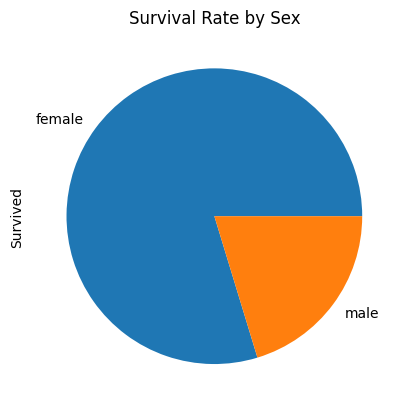

In [73]:
import matplotlib.pyplot as plt
mean=titanic_dataset.groupby("Sex")["Survived"].mean()
print(mean)

mean.plot(kind="pie")
# plt.xlabel('Sex')
# plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex')

plt.show()

Problem 5

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


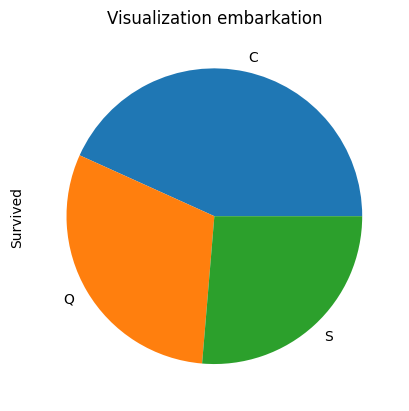

In [68]:
import matplotlib.pyplot as plt
embarked_mean=titanic_dataset.groupby("Embarked")["Survived"].mean()
print(embarked_mean)

embarked_mean.plot(kind="pie")
plt.title('Visualization embarkation')
plt.show()

Problem 6

/tmp/ipython-input-642482092.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_age.groupby(["AgeGroup", "Pclass"])["Survived"]


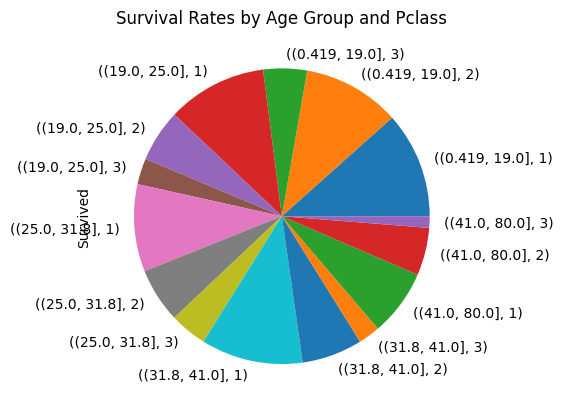

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

titanic_dataset = pd.read_csv("/content/drive/MyDrive/Concept_and_technologies_of_ai/Titanic-Dataset.csv")
data_age = titanic_dataset.dropna(subset=["Age"]).copy()
data_age["AgeGroup"] = pd.qcut(data_age["Age"], 5)

survival_age = (
    data_age.groupby(["AgeGroup", "Pclass"])["Survived"].mean()
)
survival_age

survival_age.plot(kind="pie")
plt.title("Survival Rates by Age Group and Pclass")
# plt.xlabel("Age Group")
# plt.ylabel("Survival Rate")
plt.show()